In [273]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [274]:
df1 = df.sort_values(by=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.drop(['Open', 'High', 'Low', 'Volume','Name'], axis=1)
df1.tail()

,Date,Close
3014,2017-12-22,175.01
3015,2017-12-26,170.57
3016,2017-12-27,170.60
3017,2017-12-28,171.08
3018,2017-12-29,169.23


In [275]:
df1['Value']=df1['Close']
df1 = df1.drop(['Close'], axis=1)
df1.head()

,Date,Value
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [276]:
df1['Weekday'] = df1['Date'].dt.dayofweek
df1['Year'] = df1['Date'].dt.year
df1['Week'] = df1['Date'].dt.week
df1 = df1.set_index('Date')
df1.head()

,Value,Weekday,Year,Week
Date,,,,
2006-01-03,10.68,1,2006,1
2006-01-04,10.71,2,2006,1
2006-01-05,10.63,3,2006,1
2006-01-06,10.90,4,2006,1
2006-01-09,10.86,0,2006,2


In [277]:
print(len(df1))
df1['Value_zscore'] = (df1['Value'] - df1['Value'].mean())/df1['Value'].std(ddof=0)
df1 = df1[abs(df1['Value_zscore']) < 3]
print(len(df1))

3019
3019


In [217]:
dum1 = pd.get_dummies(df1['Week'])
dum2 = pd.get_dummies(df1['Weekday'])
dum3 = pd.get_dummies(df1['Year'])
df1 = pd.concat([df1, dum1, dum2, dum3], axis=1)

In [278]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df1 = df1.drop(['Value_zscore'], axis=1)
sc2 = StandardScaler()
df1[['Weekday','Year','Week','Value']] = sc2.fit_transform(df1[['Weekday','Year','Week','Value']])
df1.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Value,Weekday,Year,Week
Date,,,,
2006-01-03,-1.212307,-0.730916,-1.593657,-1.716836
2006-01-04,-1.211633,-0.016101,-1.593657,-1.716836
2006-01-05,-1.213430,0.698715,-1.593657,-1.716836
2006-01-06,-1.207366,1.413531,-1.593657,-1.716836
2006-01-09,-1.208264,-1.445732,-1.593657,-1.649919


In [279]:
n = 1
for x in range(n):
    df1['Value-'+str(x+1)] = df1.Value.shift((x+1))

df1['Value'] = df1.Value.shift(-1)
#df1['Value'] = df1.Value.diff()

df1 = df1.dropna()
df1.head()

,Value,Weekday,Year,Week,Value-1
Date,,,,,
2006-01-04,-1.213430,-0.016101,-1.593657,-1.716836,-1.212307
2006-01-05,-1.207366,0.698715,-1.593657,-1.716836,-1.211633
2006-01-06,-1.208264,1.413531,-1.593657,-1.716836,-1.213430
2006-01-09,-1.192769,-1.445732,-1.593657,-1.649919,-1.207366
2006-01-10,-1.182888,-0.730916,-1.593657,-1.649919,-1.208264


In [280]:
df3 = df1.copy(deep=False)

In [269]:
df3 = df3.drop(['Week','Weekday','Year'], axis=1)

In [281]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8 - 1)):]
trains = np.split(train, [1], axis=1)
train_y=trains[0]
train_x=trains[1]
tests = np.split(test, [1], axis=1)
test_y=tests[0]
test_x=tests[1]

In [282]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [283]:
train_x.head()

,Weekday,Year,Week,Value-1
Date,,,,
2006-01-04,-0.016101,-1.593657,-1.716836,-1.212307
2006-01-05,0.698715,-1.593657,-1.716836,-1.211633
2006-01-06,1.413531,-1.593657,-1.716836,-1.213430
2006-01-09,-1.445732,-1.593657,-1.649919,-1.207366
2006-01-10,-0.730916,-1.593657,-1.649919,-1.208264


### Trend Seasonal Analysis

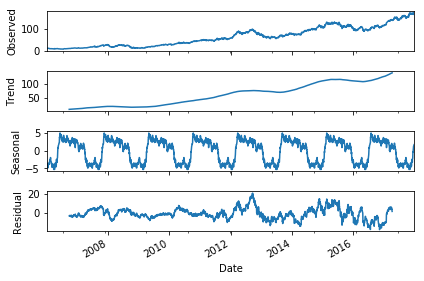

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df3.Value, model='additive', freq=365)
result.plot()
plt.show()

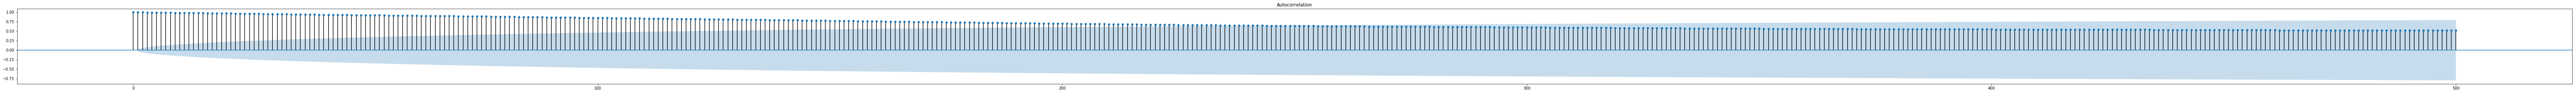

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(120,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df3.Value, lags=500, ax=ax1)

### Naive Test: Linear Regression

In [286]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
reg.score(train_x.values, train_y.values)

reg.coef_

array([[-8.89912811e-04,  7.63882301e-03,  5.34894560e-04,
         9.92844038e-01]])

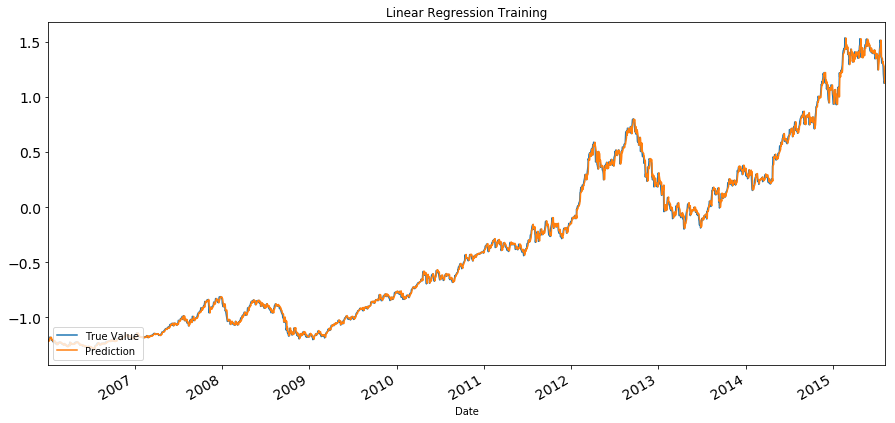

adj train r^2 = 0.9983419968939381
train mse = 0.000991602641678857


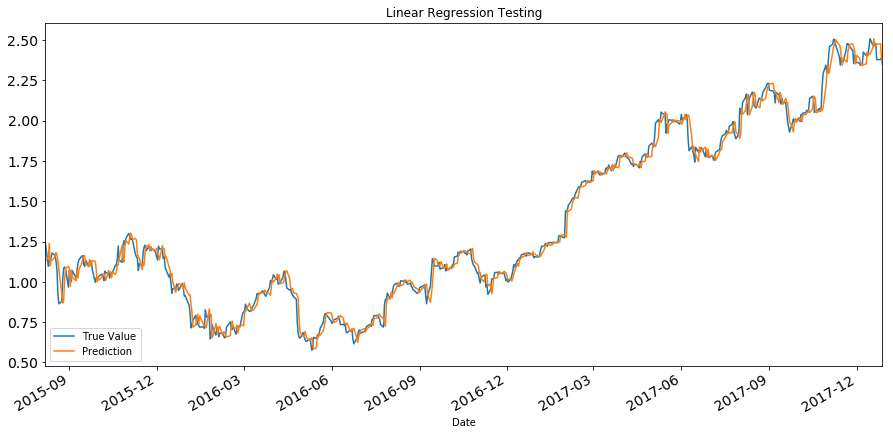

['Weekday', 'Year', 'Week', 'Value-1']
adj test r^2 = 0.989690187546843
test mse = 0.0030203239356187865


In [287]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Naive Test: SARIMAX

In [176]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df3['Value'],seasonal=True,m=7).summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3017
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood                6714.583
Date:                           Thu, 16 May 2019   AIC                         -13413.166
Time:                                   15:10:56   BIC                         -13365.072
Sample:                                        0   HQIC                        -13395.871
                                          - 3017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      2.086      0.037    9.68e-05       0.003
ar.L1          0.2999      0.137      2.194      0.028       0.032       0.568
ar.L2         -0.6647      0.155     -4.277      0.000      -0.969      -0.360
ma.L1         -0.2762      0.142     -1.950      0.051      -0.554       0.001
ma.L2          0.6245      0.163      3.830      0.000       0.305       0.944
ma.S.L7        0.0380      0.014      2.625      0.009       0.010       0.066
ma.S.L14       0.0408      0.015      2.729      0.006       0.012       0.070
sigma2         0.0007   8.37e-06     81.496      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       55.02   Jarque-Bera (JB):              6664.54
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              11.56   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
exog = train[['Weekday', 'Year', 'Week','Value-1']].values
model = SARIMAX(train['Value'],exog=exog,order=(2,1,2),
                seasonal_order=(0,0,2,7),
                enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Value   No. Observations:                 2414
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood                5726.331
Date:                           Thu, 16 May 2019   AIC                         -11430.662
Time:                                   15:11:55   BIC                         -11367.065
Sample:                                        0   HQIC                        -11407.524
                                          - 2414                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.000      0.555      0.579      -0.000       0.001
x2            -0.0522      0.025     -2.093      0.036      -0.101      -0.003
x3            -0.0036      0.002     -1.714      0.086      -0.008       0.001
x4            -0.0807      0.038     -2.107      0.035      -0.156      -0.006
ar.L1         -0.6844      0.573     -1.194      0.232      -1.808       0.439
ar.L2          0.2370      0.532      0.446      0.656      -0.805       1.279
ma.L1          0.8984      0.559      1.606      0.108      -0.198       1.994
ma.L2         -0.2208      0.622     -0.355      0.723      -1.440       0.999
ma.S.L7        0.0106      0.014      0.745      0.456      -0.017       0.039
ma.S.L14       0.0227      0.018      1.264      0.206      -0.012       0.058
sigma2         0.0004    3.7e-05     10.941      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       65.89   Jarque-Bera (JB):              7698.88
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               7.94   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


adj test r^2 = -0.2912591960677626
test mse = 0.37828244448589204


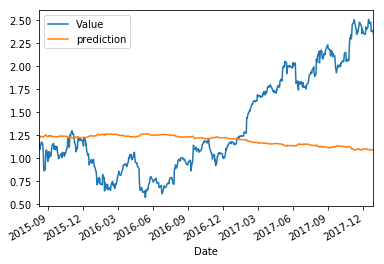

In [180]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Weekday', 'Year', 'Week', 'Value-1']]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=False)
test_y2['prediction']=predictions.values
test_y2.plot()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.Value, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.Value, test_y2.prediction)))

### Model 1: ExtraTrees

In [227]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=500, max_depth=3, min_samples_split=2)
reg.fit(train_x.values, train_y.values.ravel())

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

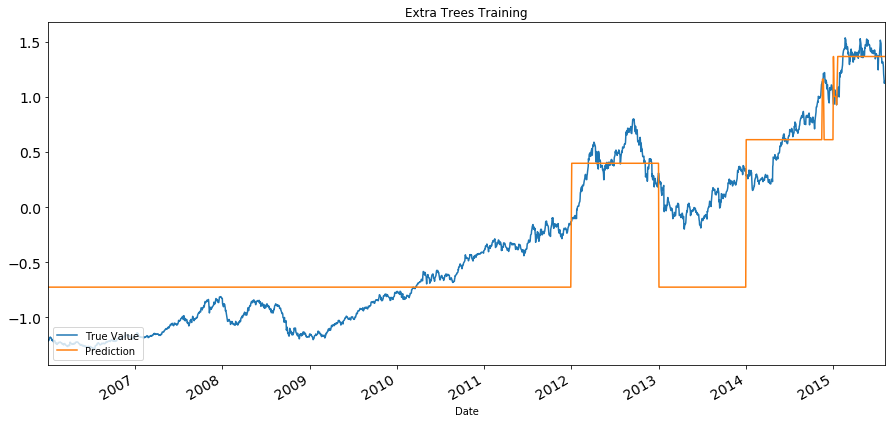

adj train r^2 = 0.7240264902340219
train mse = 0.1603385021380154


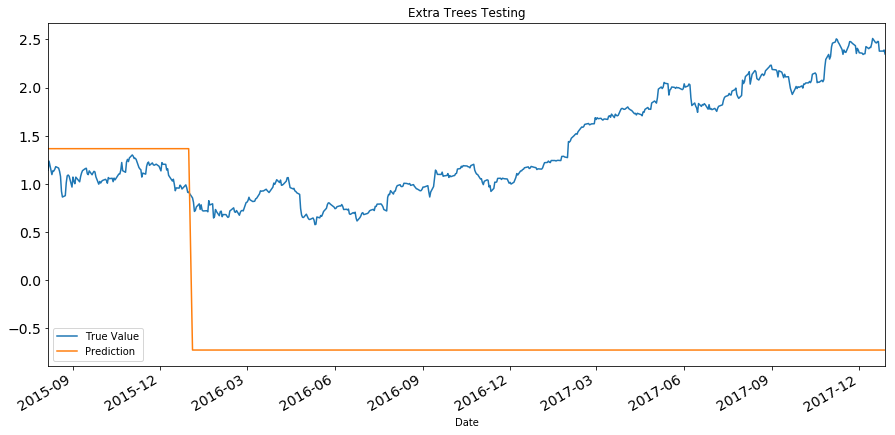

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
adj test r^2 = -13.353029315758139
test mse = 4.083941544738794


In [228]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 2: Random Forest

In [229]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_x.values, train_y.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

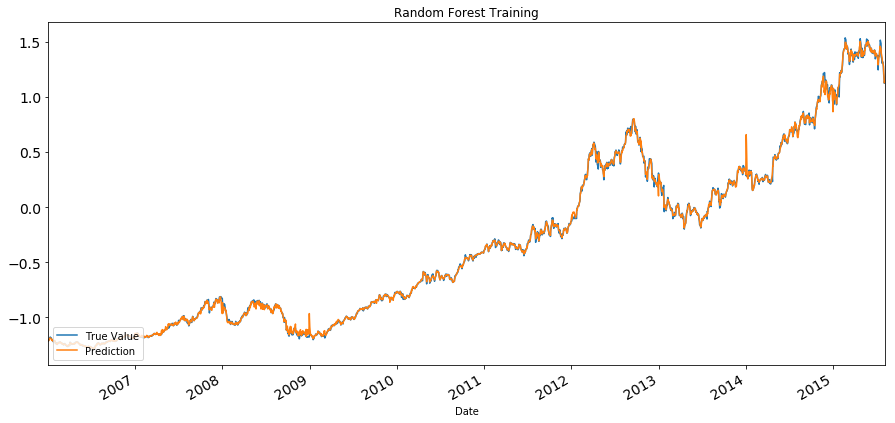

adj train r^2 = 0.9993230802680527
train mse = 0.00039328519603246234


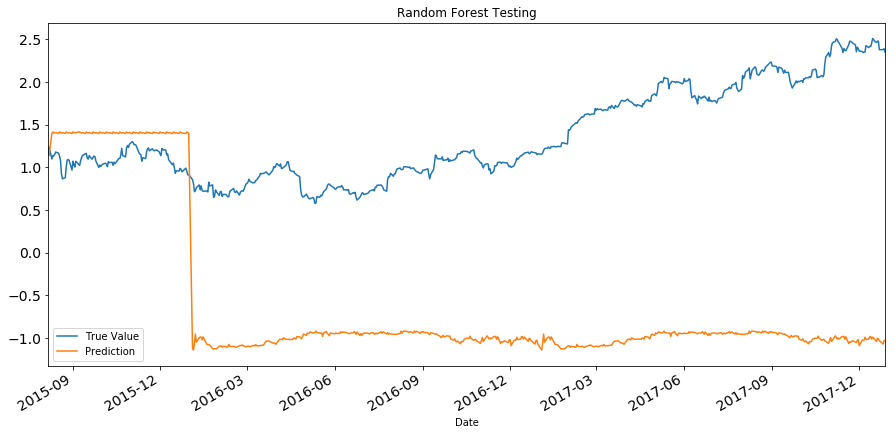

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
adj test r^2 = -17.057862774480856
test mse = 5.138096939085024


In [230]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 3: XGBoost

In [231]:
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

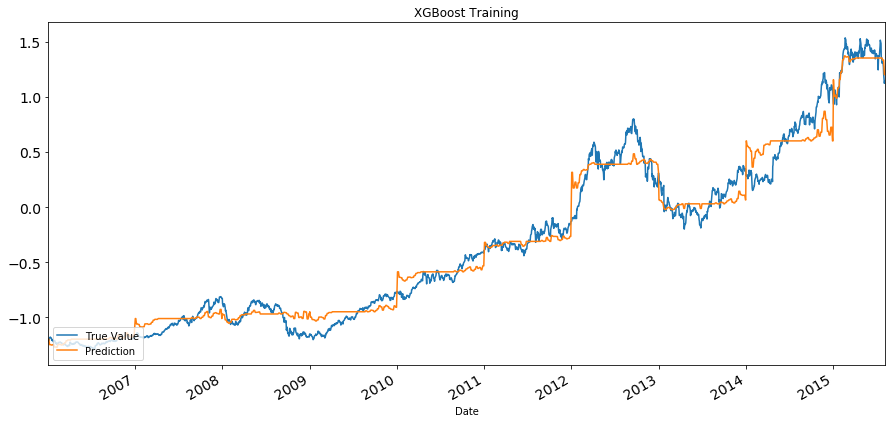

adj train r^2 = 0.9729082404257448
train mse = 0.015740105469191


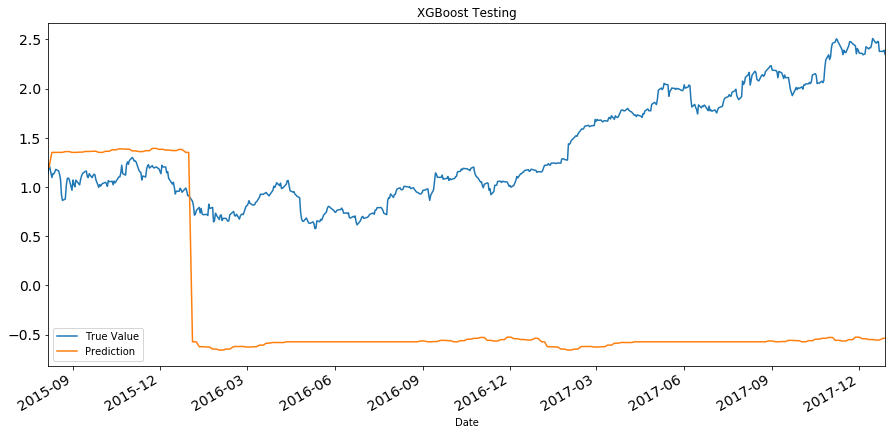

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
adj test r^2 = -11.554404977086518
test mse = 3.572169674251858


In [232]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 4: Feed Forward Neural Network

In [233]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [331]:
#K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=4, activation='tanh',kernel_regularizer=regularizers.l2(0.43)))
model.add(Dropout(0.01))
#model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(2, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.values.ravel(), validation_data=[test_x.values, test_y['Value'].values.ravel()], epochs=100,verbose=1,shuffle=False)

Train on 2414 samples, validate on 604 samples
Epoch 1/100
2414/2414 [==============================] - 2s 890us/step - loss: 2.2957 - val_loss: 1.3609
Epoch 2/100
2414/2414 [==============================] - 0s 90us/step - loss: 0.7286 - val_loss: 0.4933
Epoch 3/100
2414/2414 [==============================] - 0s 107us/step - loss: 0.2447 - val_loss: 0.2013
Epoch 4/100
2414/2414 [==============================] - 0s 90us/step - loss: 0.1059 - val_loss: 0.1237
Epoch 5/100
2414/2414 [==============================] - 0s 87us/step - loss: 0.0677 - val_loss: 0.0918
Epoch 6/100
2414/2414 [==============================] - 0s 96us/step - loss: 0.0548 - val_loss: 0.0819
Epoch 7/100
2414/2414 [==============================] - 0s 91us/step - loss: 0.0482 - val_loss: 0.0728
Epoch 8/100
2414/2414 [==============================] - 0s 86us/step - loss: 0.0439 - val_loss: 0.0559
Epoch 9/100
2414/2414 [==============================] - 0s 88us/step - loss: 0.0407 - val_loss: 0.0539
Epoch 10/100
24

2414/2414 [==============================] - 0s 97us/step - loss: 0.0072 - val_loss: 0.0132
Epoch 79/100
2414/2414 [==============================] - 0s 88us/step - loss: 0.0069 - val_loss: 0.0098
Epoch 80/100
2414/2414 [==============================] - 0s 89us/step - loss: 0.0066 - val_loss: 0.0093
Epoch 81/100
2414/2414 [==============================] - 0s 86us/step - loss: 0.0069 - val_loss: 0.0099
Epoch 82/100
2414/2414 [==============================] - 0s 85us/step - loss: 0.0066 - val_loss: 0.0084
Epoch 83/100
2414/2414 [==============================] - 0s 85us/step - loss: 0.0079 - val_loss: 0.0094
Epoch 84/100
2414/2414 [==============================] - 0s 88us/step - loss: 0.0065 - val_loss: 0.0081
Epoch 85/100
2414/2414 [==============================] - 0s 87us/step - loss: 0.0063 - val_loss: 0.0080
Epoch 86/100
2414/2414 [==============================] - 0s 90us/step - loss: 0.0064 - val_loss: 0.0085
Epoch 87/100
2414/2414 [==============================] - 0s 87us/st

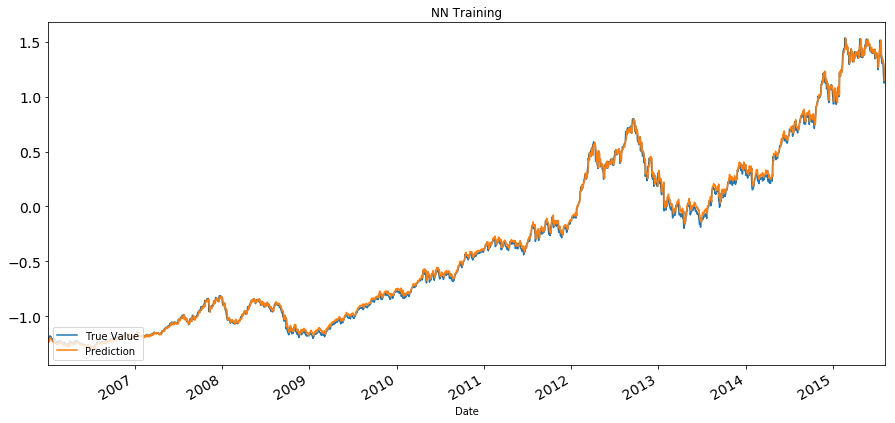

adj train r^2 = 0.9978138159248061
train mse = 0.0013074920645399066


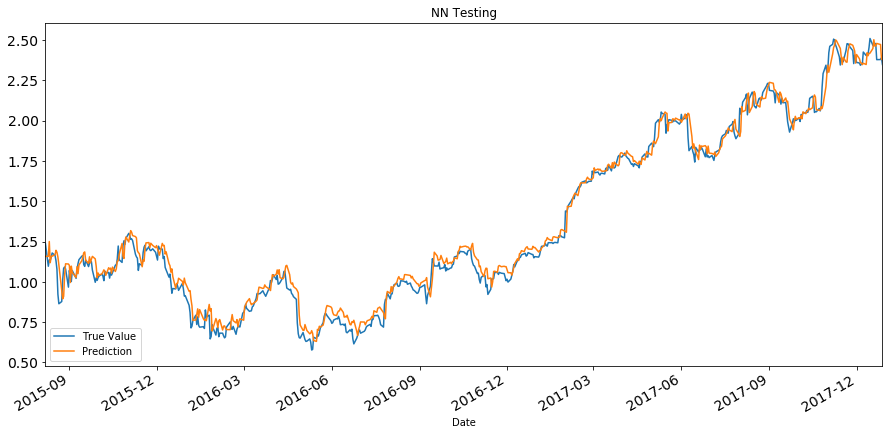

adj test r^2 = 0.9871367258633739
test mse = 0.003768376480348182


In [332]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model.predict(train_x.values)
test_y['prediction'] = model.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 5: LSTM

In [333]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [394]:
from keras.layers import LSTM
from keras import regularizers
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(30, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_regularizer=regularizers.l1(0.2),kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.values.ravel(), validation_data=[X_tst_t, test_y['Value'].values.ravel()], epochs=300, verbose=1, shuffle=False)

Train on 2414 samples, validate on 604 samples
Epoch 1/300
2414/2414 [==============================] - 2s 667us/step - loss: 39.6140 - val_loss: 37.4815
Epoch 2/300
2414/2414 [==============================] - 0s 148us/step - loss: 32.7544 - val_loss: 30.7131
Epoch 3/300
2414/2414 [==============================] - 0s 148us/step - loss: 26.5693 - val_loss: 24.7050
Epoch 4/300
2414/2414 [==============================] - 0s 149us/step - loss: 21.0686 - val_loss: 19.4556
Epoch 5/300
2414/2414 [==============================] - 0s 149us/step - loss: 16.3103 - val_loss: 14.9573
Epoch 6/300
2414/2414 [==============================] - 0s 153us/step - loss: 12.1464 - val_loss: 11.0320
Epoch 7/300
2414/2414 [==============================] - 0s 153us/step - loss: 8.5415 - val_loss: 7.7951
Epoch 8/300
2414/2414 [==============================] - 0s 152us/step - loss: 5.6776 - val_loss: 5.3979
Epoch 9/300
2414/2414 [==============================] - 0s 147us/step - loss: 3.5346 - val_loss: 3.6

Epoch 78/300
2414/2414 [==============================] - 0s 150us/step - loss: 0.0827 - val_loss: 0.1363
Epoch 79/300
2414/2414 [==============================] - 0s 154us/step - loss: 0.0810 - val_loss: 0.1299
Epoch 80/300
2414/2414 [==============================] - 0s 146us/step - loss: 0.0811 - val_loss: 0.1300
Epoch 81/300
2414/2414 [==============================] - 0s 146us/step - loss: 0.0801 - val_loss: 0.1271
Epoch 82/300
2414/2414 [==============================] - 0s 147us/step - loss: 0.0801 - val_loss: 0.1278
Epoch 83/300
2414/2414 [==============================] - 0s 148us/step - loss: 0.0790 - val_loss: 0.1228
Epoch 84/300
2414/2414 [==============================] - 0s 150us/step - loss: 0.0787 - val_loss: 0.1231
Epoch 85/300
2414/2414 [==============================] - 0s 150us/step - loss: 0.0775 - val_loss: 0.1198
Epoch 86/300
2414/2414 [==============================] - 0s 144us/step - loss: 0.0775 - val_loss: 0.1201
Epoch 87/300
2414/2414 [======================

Epoch 155/300
2414/2414 [==============================] - 0s 147us/step - loss: 0.0536 - val_loss: 0.0631
Epoch 156/300
2414/2414 [==============================] - 0s 143us/step - loss: 0.0532 - val_loss: 0.0632
Epoch 157/300
2414/2414 [==============================] - 0s 147us/step - loss: 0.0533 - val_loss: 0.0621
Epoch 158/300
2414/2414 [==============================] - 0s 147us/step - loss: 0.0527 - val_loss: 0.0622
Epoch 159/300
2414/2414 [==============================] - 0s 149us/step - loss: 0.0528 - val_loss: 0.0621
Epoch 160/300
2414/2414 [==============================] - 0s 151us/step - loss: 0.0526 - val_loss: 0.0617
Epoch 161/300
2414/2414 [==============================] - 0s 148us/step - loss: 0.0524 - val_loss: 0.0610
Epoch 162/300
2414/2414 [==============================] - 0s 149us/step - loss: 0.0520 - val_loss: 0.0611
Epoch 163/300
2414/2414 [==============================] - 0s 149us/step - loss: 0.0519 - val_loss: 0.0611
Epoch 164/300
2414/2414 [============

2414/2414 [==============================] - 0s 153us/step - loss: 0.0428 - val_loss: 0.0462
Epoch 232/300
2414/2414 [==============================] - ETA: 0s - loss: 0.041 - 0s 150us/step - loss: 0.0415 - val_loss: 0.0470
Epoch 233/300
2414/2414 [==============================] - 0s 148us/step - loss: 0.0425 - val_loss: 0.0460
Epoch 234/300
2414/2414 [==============================] - 0s 155us/step - loss: 0.0416 - val_loss: 0.0458
Epoch 235/300
2414/2414 [==============================] - 0s 151us/step - loss: 0.0419 - val_loss: 0.0456
Epoch 236/300
2414/2414 [==============================] - 0s 156us/step - loss: 0.0417 - val_loss: 0.0459
Epoch 237/300
2414/2414 [==============================] - 0s 153us/step - loss: 0.0417 - val_loss: 0.0453
Epoch 238/300
2414/2414 [==============================] - 0s 152us/step - loss: 0.0419 - val_loss: 0.0455
Epoch 239/300
2414/2414 [==============================] - 0s 151us/step - loss: 0.0412 - val_loss: 0.0456
Epoch 240/300
2414/2414 [==

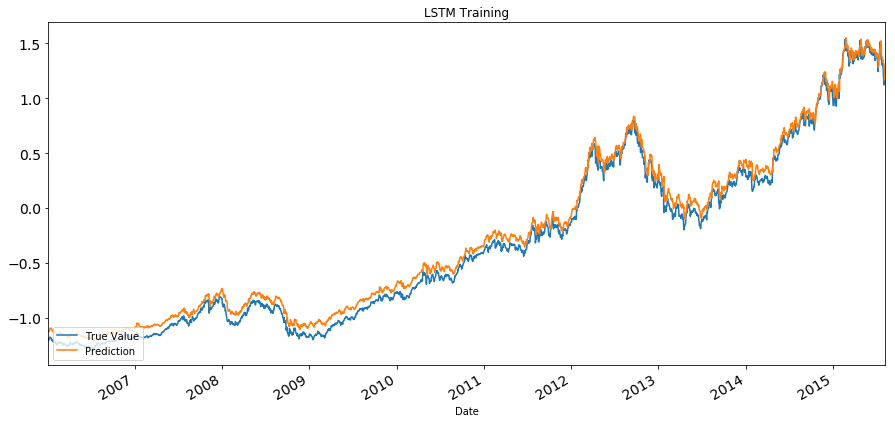

adj train r^2 = 0.9889527017089457
train mse = 0.006607062513195694


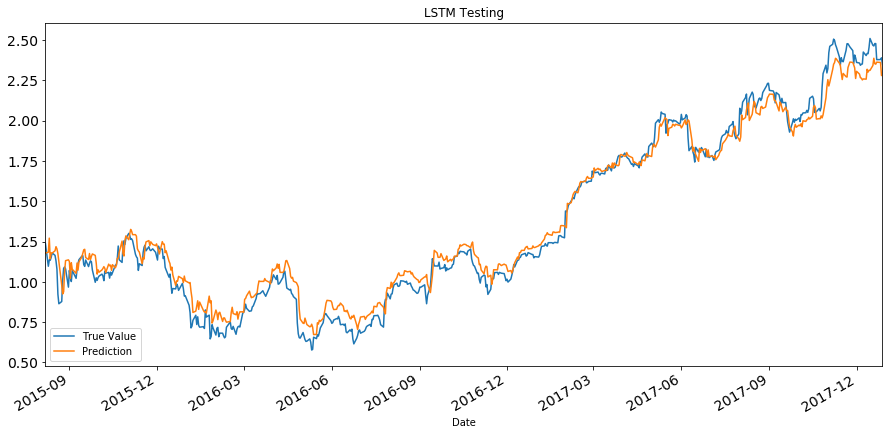

adj test r^2 = 0.9777269164826897
test mse = 0.0065250388960052105


In [395]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model_lstm.predict(X_tr_t)
test_y['prediction'] = model_lstm.predict(X_tst_t)
train_y2['Value'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model_lstm.predict(X_tr_t))))
test_y['Value'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 6: TPOT

In [396]:
def my_custom_accuracy(y_true, y_pred):
    
    return (adj_r2_score((r2_score(y_true, y_pred)),train_x.shape[0], train_x.shape[1]))

In [397]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=15, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.values.ravel())

Generation 1 - Current best internal CV score: -0.001006474748072883
Generation 2 - Current best internal CV score: -0.001006474748072883
Generation 3 - Current best internal CV score: -0.001006474748072883
Generation 4 - Current best internal CV score: -0.001006474748072883
Generation 5 - Current best internal CV score: -0.001000679763013756
Generation 6 - Current best internal CV score: -0.001000679763013755
Generation 7 - Current best internal CV score: -0.001000679763013755
Generation 8 - Current best internal CV score: -0.001000679763013755
Generation 9 - Current best internal CV score: -0.001000679763013755
Generation 10 - Current best internal CV score: -0.001000679763013755
Generation 11 - Current best internal CV score: -0.001000679763013755
Generation 12 - Current best internal CV score: -0.0010006797630137542
Generation 13 - Current best internal CV score: -0.0010006797630137542
Generation 14 - Current best internal CV score: -0.0010006797630137542
Generation 15 - Current be

Generation 118 - Current best internal CV score: -0.000995634265066374
Generation 119 - Current best internal CV score: -0.000995634265066374
Generation 120 - Current best internal CV score: -0.000995634265066374
Generation 121 - Current best internal CV score: -0.000995634265066374
Generation 122 - Current best internal CV score: -0.000995634265066374
Generation 123 - Current best internal CV score: -0.000995634265066374
Generation 124 - Current best internal CV score: -0.000995634265066374
Generation 125 - Current best internal CV score: -0.000995634265066374
Generation 126 - Current best internal CV score: -0.000995634265066374
Generation 127 - Current best internal CV score: -0.000995634265066374
Generation 128 - Current best internal CV score: -0.000995634265066374
Generation 129 - Current best internal CV score: -0.000995634265066374
Generation 130 - Current best internal CV score: -0.000995634265066374
Generation 131 - Current best internal CV score: -0.000995634265066374
Genera

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=15, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validat

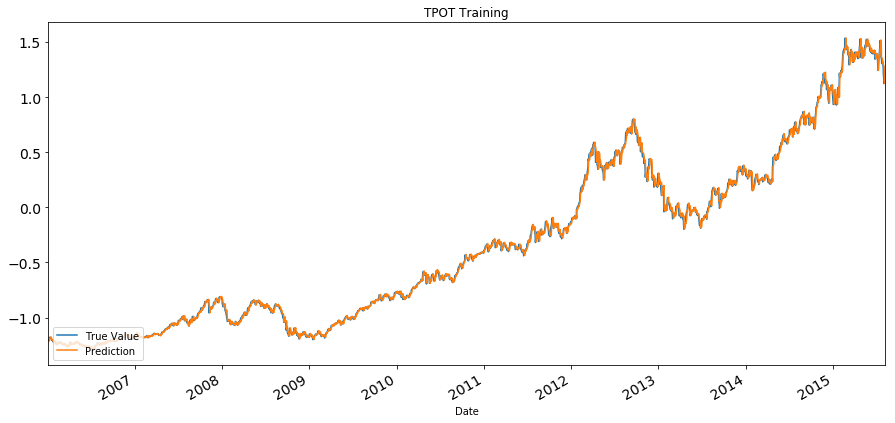

adj train r^2 = 0.9983335106544702
train mse = 0.0009966780106233117


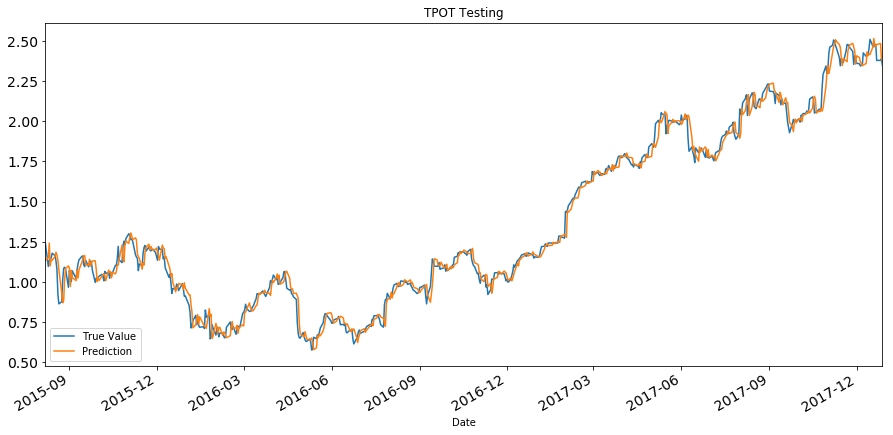

adj test r^2 = 0.9896910844760749
test mse = 0.0030200611745996087


In [398]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, train_y2.prediction)))
test_y['Value'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))